In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
data = pd.read_csv('automobile.csv')
data.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [108]:
ds = data.copy()
ds.drop('symboling', axis = 1,inplace =True)

In [109]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  165 non-null    float64
 1   make               202 non-null    object 
 2   fuel-type          202 non-null    object 
 3   aspiration         202 non-null    object 
 4   num-of-doors       200 non-null    object 
 5   body-style         202 non-null    object 
 6   drive-wheels       202 non-null    object 
 7   engine-location    202 non-null    object 
 8   wheel-base         202 non-null    float64
 9   length             202 non-null    float64
 10  width              202 non-null    float64
 11  height             202 non-null    float64
 12  curb-weight        202 non-null    int64  
 13  engine-type        202 non-null    object 
 14  num-of-cylinders   202 non-null    object 
 15  engine-size        202 non-null    int64  
 16  fuel-system        202 non

In [110]:
ds.isnull().sum()

normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [118]:
ds.horsepower = pd.to_numeric(ds.horsepower, errors = 'coerce')

In [119]:
for i in ds.columns:
    if ((ds[i].isnull().sum() / len(ds)) * 100) < 30:
        if ds[i].dtypes != 'O':
            ds[i].fillna(ds[i].median(), inplace = True)
        else:
            ds[i].fillna(ds[i].mode()[0], inplace = True)
    else:
        ds.drop(i, axis = 1, inplace = True)

ds.isnull().sum()

normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [117]:
# display(ds[num].head())


cat = ds.select_dtypes(exclude = "number")
num = ds.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Date')
display(cat.head())

Numerical Data


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,115.0,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,13495
1,115.0,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,16500
2,115.0,94.5,171.2,65.5,52.4,2823,152,9.0,154.0,19,26,16500
3,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,102.0,24,30,13950
4,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,115.0,18,22,17450




Categorical Date


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,peak-rpm
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,5000
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,5000
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,5000
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,5500
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,5500


In [120]:
ds.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,120.584158,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,103.366337,25.148515,30.658416,13253.752475
std,32.082688,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,37.289435,6.421956,6.809940,7954.919591
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,98.750000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,70.000000,19.000000,25.000000,7778.250000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,95.000000,24.000000,30.000000,10320.000000
75%,137.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,116.000000,30.000000,34.000000,16502.250000
max,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,262.000000,49.000000,54.000000,45400.000000


In [121]:
cols_to_scale = []
for i in num.columns:
  if ds[i].describe()[2] > 1500:
    cols_to_scale.append(i)

cols_to_scale

['price']

In [122]:
# LABEL ENCODE THE CATEGORICAL COLUMNS
from sklearn.preprocessing import LabelEncoder

encoded = {}  # ................................................................ Have a dictionary to save the encoders
for i in cat.columns: # ........................................................ Iterate through the new_categorical variables
    encode = LabelEncoder() # .................................................. Instantiate the encoder transformer
    ds[i] = encode.fit_transform(ds[i]) # ...................................... Encode the columns in ech iteration
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb')) # ...................... Save the transformer to file for future reusal
    encoded[i +'_encoder'] = encode # .......................................... Save the transformer to the above stated dictionary for easy access

encoded

{'make_encoder': LabelEncoder(),
 'fuel-type_encoder': LabelEncoder(),
 'aspiration_encoder': LabelEncoder(),
 'num-of-doors_encoder': LabelEncoder(),
 'body-style_encoder': LabelEncoder(),
 'drive-wheels_encoder': LabelEncoder(),
 'engine-location_encoder': LabelEncoder(),
 'engine-type_encoder': LabelEncoder(),
 'num-of-cylinders_encoder': LabelEncoder(),
 'fuel-system_encoder': LabelEncoder(),
 'bore_encoder': LabelEncoder(),
 'stroke_encoder': LabelEncoder(),
 'peak-rpm_encoder': LabelEncoder()}

In [87]:
# from sklearn.preprocessing import StandardScaler,LabelEncoder
# import joblib
# scaler_holder = {}

# for columns in cols_to_scale[: -1]:
#     scaler = StandardScaler()
#     ds[columns] = scaler.fit_transform(ds[[columns]])
#     scaler_holder[columns + '_scale'] = scaler
#     joblib.dump(scaler,open(f'{columns}_scaler.pkl','wb'))
#     print(f"{columns} successfully scaled")

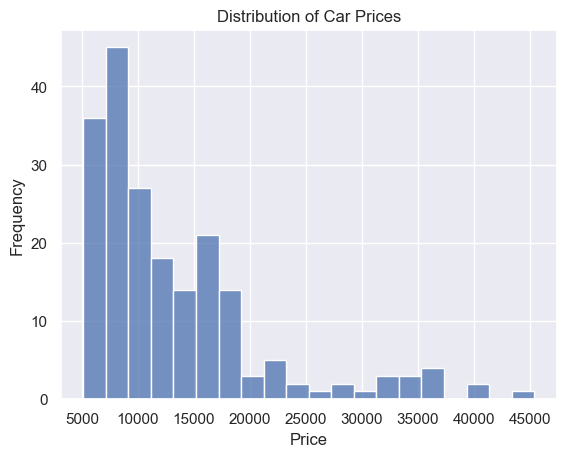

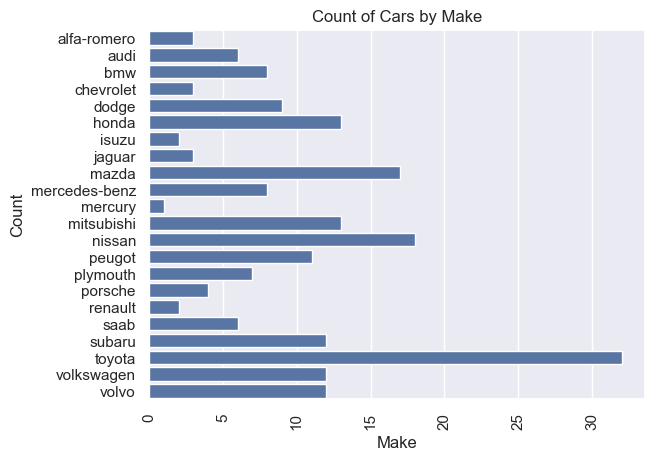

In [123]:

import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution of numerical features
sns.histplot(data['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

# Visualize the distribution of categorical features
sns.countplot(data['make'])
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Count of Cars by Make')
plt.show()


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

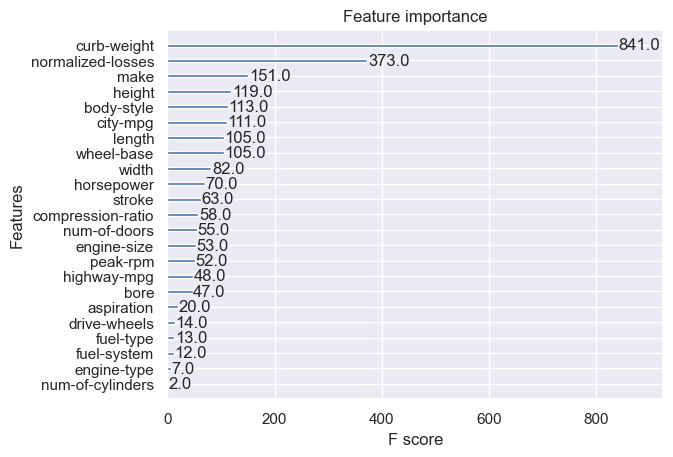

In [124]:
# conduct Feature Selection
# - Using XGBOOST to find feature importance

import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBRegressor()


x = ds.drop('price', axis = 1)
y = ds.price

model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [125]:
ds.columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [126]:
sel_cols = ['curb-weight','normalized-losses','make', 'body-style', 'horsepower', 'city-mpg',
            'height',  'price']

ds = ds[sel_cols]
ds.head()

,curb-weight,normalized-losses,make,body-style,horsepower,city-mpg,height,price
0,2548,115.0,0,0,111.0,21,48.8,13495
1,2548,115.0,0,0,111.0,21,48.8,16500
2,2823,115.0,0,2,154.0,19,52.4,16500
3,2337,164.0,1,3,102.0,24,54.3,13950
4,2824,164.0,1,3,115.0,18,54.3,17450


In [127]:
# Modelling
from sklearn.model_selection import train_test_split

x = ds.drop('price', axis = 1)
y = ds.price

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 90)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (161, 7)
Xtest: (41, 7)
Ytrain: (161,)
Ytest: (41,)


In [128]:
#algorithm

from xgboost import XGBRegressor
from sklearn.metrics import r2_score
xgb = XGBRegressor()

xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [129]:
cross_validate = xgb.predict(xtrain)
score = r2_score(cross_validate, ytrain).round(2) * 100
if score < 70:
    print(f'The Model is Underfitting as the score is: {score}%')
else:
    print(f'The Model Score {score}% is good')

The Model Score 100.0% is good


In [130]:
test_pred =  xgb.predict(xtest)
test_score = r2_score(test_pred, ytest).round(2) * 100
if score - test_score > 20:
    print(f'The Model is Overfitting as the score is: {test_score}%')
else:
    print(f'The Model Score {test_score}% is Optimal')

The Model Score 89.0% is Optimal


In [105]:
#to save your model
joblib.dump(xgb, open('AutomobileModel.pkl','wb'))